In [1]:
import uproot
import pandas as pd
import awkward as ak
import numpy as np 
import h5py
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import os

In [2]:
treename= 'events' 

filename = {} 
upfile={}
params={}

filename['Zmuons']= 'data/drellyan_complete_merged.root'
upfile['Zmuons']= uproot.open(f'{filename["Zmuons"]}:{treename}')
params['Zmuons']= upfile['Zmuons'].arrays()

print(params['Zmuons'][0].fields)


['numberjet', 'njet_e', 'jet_e', 'njet_pt', 'jet_pt', 'njet_eta', 'jet_eta', 'njet_phi', 'jet_phi', 'njet_ch', 'jet_ch', 'njet_mass', 'jet_mass', 'njet_btag', 'jet_btag', 'njet_hflav', 'jet_hflav', 'njet_corrpt', 'jet_corrpt', 'njet_corrptUp', 'jet_corrptUp', 'njet_corrptDown', 'jet_corrptDown', 'njet_corrptSmearUp', 'jet_corrptSmearUp', 'njet_corrptSmearDown', 'jet_corrptSmearDown', 'njet_corrmass', 'jet_corrmass', 'njet_corre', 'jet_corre', 'njet_corrpx', 'jet_corrpx', 'njet_corrpy', 'jet_corrpy', 'njet_corrpz', 'jet_corrpz', 'btag_Weight', 'btag_WeightUp', 'btag_WeightDn', 'met_e', 'met_pt', 'met_px', 'met_py', 'met_phi', 'met_significance', 'met_rawpt', 'met_rawphi', 'met_rawe', 'numGenPart', 'nGenPart_pt', 'GenPart_pt', 'nGenPart_eta', 'GenPart_eta', 'nGenPart_mass', 'GenPart_mass', 'nGenPart_pdgId', 'GenPart_pdgId', 'nGenPart_phi', 'GenPart_phi', 'nGenPart_px', 'GenPart_px', 'nGenPart_py', 'GenPart_py', 'nGenPart_pz', 'GenPart_pz', 'nGenPart_status', 'GenPart_status', 'nGenPart_m

In [3]:
muon_e=params['Zmuons']['muon_e']
muon_ch=params['Zmuons']['muon_ch']
muon_pt=params['Zmuons']['muon_pt']
muon_eta=params['Zmuons']['muon_eta']
muon_phi=params['Zmuons']['muon_phi']


In [4]:
len(params['Zmuons'])

44397

In [5]:
temp=[]
index_dimuon=[]
index_dimuon_dch=[]

for i in range(len(muon_ch)):
    temp.append(len(muon_ch[i]))
    
temp=np.array(temp)
index_dimuon=np.where(temp>=2)[0]


for i in index_dimuon:
    if muon_ch[i][0] != muon_ch[i][1]:
        index_dimuon_dch.append(i)
    

In [6]:
print(len(index_dimuon), len(index_dimuon_dch))

30267 25499


In [7]:
# m^2=2pt1*2pt2*(cosh(eta1-eta2)-cos(phi1-phi2))

#invariant mass

dm_imass=[]
zcandidates_idx=[]

for i in index_dimuon:
    imass=(2*muon_pt[i][0]*muon_pt[i][1]*(np.cosh(muon_eta[i][0]-muon_eta[i][1])-np.cos(muon_phi[i][0]-muon_phi[i][1])))**(1/2)
    dm_imass.append(imass)
    if(imass<=93 and imass>=89):
        zcandidates_idx.append(i)
        
        
    

import matplotlib.pyplot as plt
%matplotlib inline



plt.hist(dm_imass, bins=7050, histtype='step', fill=False)  # arguments are passed to np.histogram
plt.title("Invariant mass of a ZtoMuMu sample of dimuon pairs.")
plt.xlim([0,180])
plt.xlabel('Dimuon Invariant Mass [GeV]')
plt.ylabel('Number of Events')
plt.show()

'''

plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(0, 4000, 25)
dm_imass.plot.hist(bins=bins, alpha=1, label='muon_e',histtype='step')
#df['VV'][VARS[1]].plot.hist(bins=bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,5000)
'''

In [9]:
print(len(muon_ch), len(index_dimuon_dch), len(index_dimuon))

44397 25499 30267


In [10]:

gen_eta=params['Zmuons']['GenPart_eta']
gen_phi=params['Zmuons']['GenPart_phi']
gen_pt=params['Zmuons']['GenPart_pt']


In [11]:
#for i in index_dimuon_dch:
#    print(muon_pt[i])

In [12]:
#for i in index_dimuon_dch:
#    print(muon_eta[i])

In [13]:
len(index_dimuon_dch)

25499

In [14]:
print(muon_eta)

[[1.05, -1.04], [1.25], [-2.31, -1.97], ... -0.652], [1.79], [-0.928, -1.63, -1.68]]


In [15]:
muon_genidx=params['Zmuons']['muon_genpartidx']

In [16]:
print(muon_genidx)

[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]


In [17]:
gen_mId=params['Zmuons']['GenPart_motherId']

In [18]:
gen_mId[0][0]

-13

In [19]:
'''
tigh_idx=[]
for i in index_dimuon_dch:
    if tighmu[i][0]==1 and tighmu[i][1]==1:
        tigh_idx.append(i)
'''    

'\ntigh_idx=[]\nfor i in index_dimuon_dch:\n    if tighmu[i][0]==1 and tighmu[i][1]==1:\n        tigh_idx.append(i)\n'

In [20]:
gen_pt=params['Zmuons']['GenPart_pt']

In [21]:
temp_1=[]
index_digen=[]
index_digen_z=[]

In [22]:
for i in range(len(gen_pt)):
    temp_1.append(len(gen_pt[i]))
    
temp_1=np.array(temp_1)
index_digen=np.where(temp_1>=2)[0]


In [23]:
print(len(gen_pt),  len(index_digen))

44397 30267


In [24]:
for i in index_digen:
    if(gen_mId[i][0]==13 and gen_mId[i][1]==-13):
        index_digen_z.append(i)
    

In [25]:
gen_pt=params['Zmuons']['GenPart_pt']
gen_eta=params['Zmuons']['GenPart_eta']
gen_phi=params['Zmuons']['GenPart_phi']


In [26]:
dm_imass_1=[]

for i in index_digen_z:
    dm_imass_1.append((2*gen_pt[i][0]*gen_pt[i][1]*(np.cosh(gen_eta[i][0]-gen_eta[i][1])-np.cos(gen_phi[i][0]-gen_phi[i][1])))**(1/2))
    

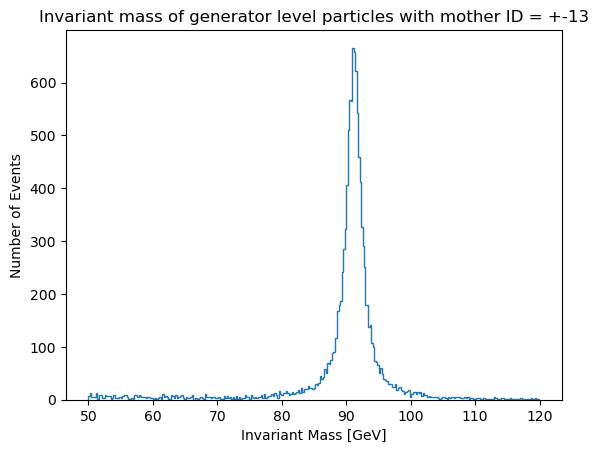

In [38]:
plt.hist(dm_imass_1, bins='auto', histtype='step', fill=False)  # arguments are passed to np.histogram
plt.title("Invariant mass of generator level particles with mother ID = +-13")
#plt.xlim([0,150])
plt.xlabel('Invariant Mass [GeV]')
plt.ylabel('Number of Events')
plt.show()


In [28]:
for i in range(len(gen_mId)):
    print(gen_mId[i])

[-13, 13]
[-13]
[13, 13]
[13, -13]
[-13, 13]
[]
[13]
[]
[-13, 13]
[-24]
[-13]
[13, 13]
[13, -13, -13]
[13, -13]
[-13, 13]
[-13, 13]
[13, -13, -24]
[13, 13]
[-13, -13, -13]
[-13, 13, 13]
[13, -13]
[13, -13, 13]
[-13, -13, -13, -13, -13, -13, -13]
[]
[-13]
[-13, 13, -13]
[-13]
[-13, 13]
[-13, 13]
[-13, 13, 13, 13, -24]
[-13, 13, 24]
[-13, -13]
[-13]
[-13, 13]
[13]
[13]
[-13]
[-13]
[-13]
[]
[]
[-13, 13, -13]
[13, 13, -13, 13]
[-13, -13]
[-13]
[-13, 13]
[]
[13, -13]
[-13, 13]
[13]
[-13, 13]
[-13]
[13]
[13, 13]
[13]
[-13]
[-13, 13, -13]
[13, -13]
[13, 13]
[-13, 13]
[13, -13, -13]
[13, 13]
[-13, -13, -13]
[13]
[13]
[13]
[13, -13, -13, 13]
[13]
[13, 13, 13, 13]
[-13, -13, -13, -13]
[13]
[-13]
[-13, 13, 13, 13]
[-13, -13, 24, 24, 24]
[13, 13]
[-13, 13, 13]
[]
[-13, 13, -13]
[13, -13]
[]
[-13]
[-13, -13]
[-13]
[13, -13]
[24]
[-13, 13]
[-13, 13]
[-13, 13]
[-13, 13]
[-13, -13]
[-13, -13, -13]
[13, -13]
[13, -13]
[-13, 13]
[-13, 13, 13, 13]
[]
[13, -13, 13, -13]
[-13, 13]
[13, 13]
[13, -24]
[-13, 

[13, -13, -13]
[]
[13, -13]
[-13, 13, 13]
[-13]
[13, -13, -13]
[13, -13]
[-13]
[-13, 13, 13, 13, 13]
[13, -13, 13]
[-13]
[-13, 13]
[]
[-13, -13, -13]
[]
[-13, -13, -13]
[13, -13]
[13, 13, 13, -13]
[-13]
[13, -13]
[-13, 13, -13]
[-13, 13]
[]
[-13, 13, 13]
[13, -13]
[13, -13]
[-13, -13]
[-13, 13]
[]
[-13, 13, 13]
[-13]
[13, -13]
[-13, 13]
[13]
[-13, 13, -13]
[-13, -13]
[]
[13]
[-13, 13]
[13, 13, 13]
[13]
[-13, 13]
[-13]
[-13, -13]
[13, -13, 24]
[13]
[]
[-13, 13]
[-13, 13]
[-13, 13]
[13, -13, 13]
[13, -13, 13, 13, 13]
[-13, 13, -13, -13]
[13]
[-13]
[-13]
[-13]
[-13, 13]
[-13]
[-13, -13]
[13]
[-13, 13, -13]
[-13, 13, 13]
[-13, 13]
[-13, 13, 13]
[-13, 13]
[13, -13, -13]
[13]
[13, -13, -13]
[13, -13]
[13, -13, 13]
[-13, -13, -13]
[13]
[-13, -13]
[-13]
[-13, 13]
[-13, 13]
[-13, 13]
[13]
[-13, 13, -13, 13, 13]
[13, 13, 13, 13, 13]
[]
[-13, -13]
[-13, 13, -13]
[13, -13, -13]
[13, -13, 13]
[13, -13]
[-13, 13]
[-13]
[13]
[-13, -13]
[-13, 13]
[13]
[13, -13, 13, -13]
[-13, 13]
[13, -13]
[-13, 13]
[

[-13]
[]
[-13, 13]
[-13]
[-13, 13]
[-13, 13, -13, 13, -13, 13, 13]
[-13, 13]
[-13]
[13, 13]
[-13, 13, -13]
[-13]
[13, -13, -13]
[-13]
[-13, 13]
[]
[]
[-13, 13, 13]
[13, 13]
[-13, 13]
[-13]
[-13, 13]
[-13, 13, -13, -13]
[-13, 13, -13, -13, -13]
[]
[13, 13, -13, -13, 13]
[-13, 13]
[13]
[13, -13, -13, -13, 13, -13]
[]
[13]
[-13]
[13]
[-13, 13]
[-13, -13, -13]
[-13]
[-13, -13, -13, -13]
[-13, 13, -13]
[]
[13, -13]
[13, 13]
[-13]
[-13]
[13]
[13, -13]
[13, -13]
[13, -13]
[13]
[-13]
[13]
[-13, 13]
[13, -13, -13]
[13]
[]
[-13]
[13, -13, 24]
[-13, -13, -13]
[13, 13]
[13, -13, -13]
[-13, 13]
[13, 13]
[13, -13]
[13, 13]
[13]
[13]
[-13, 13, -13, 13]
[13, -13]
[13, -13]
[]
[-24, -13, -13]
[-13, 13, 13]
[13, -13]
[13, -13, -13, -13]
[-13, 13]
[-13, 13, -13]
[-13]
[-13, 13, -13]
[13]
[-13, -13]
[13, -13, 13]
[13, 13, -13, 13]
[-13, 13]
[-13, -13, -13, -13]
[-13]
[13]
[-13]
[13, -13]
[-13]
[-13, 13]
[13, -13, 13, 13, 13]
[-13]
[-13, -13, -13, -13, -13]
[-13]
[13, -13]
[13, -13, -13]
[-13]
[-13, 13]
[1

[13, -13]
[13]
[13, -13, 13, -24]
[-13, 24]
[-13]
[-13]
[13]
[-13]
[-13, -13]
[-13, 13]
[-13]
[-13, -13]
[13]
[13, -13]
[13]
[13]
[13]
[13, -13]
[-13, -13]
[13, -13, 13, 13]
[13, 13]
[]
[13, 13, 13]
[-13, -13, 13, -13]
[]
[-13, -13, 13]
[13, -13]
[]
[-13]
[-13, -13]
[-13, -13]
[]
[13, -13]
[-13, 13, -24]
[-13, 13, -13, -13]
[-13]
[-13, 13, -13]
[]
[13]
[13, -13]
[-13, -13]
[13, -13]
[-13, -13]
[-13, 13, 13, -13]
[13]
[-13, 13, 13]
[13, -13, -13]
[-13, 13, 24, 24]
[-13, 13]
[13, -13]
[-13, 13]
[-13, 13]
[13, -13]
[-13, 13]
[]
[-13, 13]
[13, -13, -13]
[13, -13]
[13]
[-13, 13]
[-13]
[13, -13, 13]
[-13]
[-13]
[]
[-13]
[13, -13, 13, -13]
[-13]
[-13, 13, -13]
[-13, 13]
[-13, 13, 13]
[-13]
[-13, 13, 13, -13]
[13]
[13, -13]
[13]
[13, 13]
[-13]
[-13, 13, -13, 13]
[13, -13]
[]
[-13]
[-13]
[13, 13]
[13, -13]
[-13, 13, 13]
[-13]
[13, -13, -13]
[13]
[13, -13, 13, 13]
[]
[13, -13, 13]
[-13]
[13, -13]
[13, 13, 13]
[81, 81, 13]
[]
[-13]
[13, -13]
[-13, 13]
[13, -13, 13]
[-13]
[-13, 13, 13]
[13, -13]
[

[-13]
[13, -13]
[-13, 13]
[]
[-13, 13]
[13]
[-13]
[13, -13, -13]
[13]
[13, 13]
[-13, 13, 13]
[13, 13]
[13, -13]
[13, 13, 13, 13]
[13]
[-13]
[-13]
[-13, 13]
[13, 13, 13, -13]
[13]
[-13, -13, -13]
[13, 13, 13]
[13, 13]
[13, -13, -24, -13]
[13, -13, 13]
[-13]
[13, 24, 24]
[13]
[-13, 13, -13]
[13, -13, 13]
[13, 13]
[]
[-13]
[13, -13]
[]
[-13, -13, -13]
[13, 13]
[-13, 24, 13, 13, -13, -13]
[13]
[13, -13]
[13, 13, -24]
[13, -13, 13]
[13, -13, 13]
[-13, 13]
[-13, 13, -13]
[13, -13]
[-13, 13]
[-13, 13, -13]
[-13, 13]
[-13, 13, -13, -13]
[-13, 13]
[-13, 13]
[-13, 13]
[-13, 13]
[]
[13, -13]
[13, -13]
[]
[13, -13]
[-13, 13]
[-13, 13]
[]
[-13, 13]
[13]
[13, -13]
[-13, 13]
[13, 13, -13]
[-13]
[-13]
[13, -13]
[13, -13, -13]
[13, 13]
[13, 13]
[-13]
[13]
[13, -13, -13, 13]
[-13, 13, 13, 13, -13, -13]
[13, -13]
[13, -13]
[-13, 13]
[13, -13]
[-13, 13, -13]
[]
[]
[-13, 13, -13, -13]
[-13, 13]
[-13, 13, -13]
[]
[13]
[-13, 13]
[-13, 13]
[]
[-13, 13, 13, -13, -13]
[-13, -13, -13]
[]
[-13, 13, -13]
[-13]
[13

[13, -13, -13]
[-13, 13, -13]
[-13, 13]
[13]
[-13, 13, -13]
[-13]
[13, 13, 13]
[13, -13, 13]
[13]
[13, -13]
[-13, -13, -13]
[13, -13]
[-13, 13]
[-13, 13]
[13, 13]
[13]
[13, 13]
[]
[13]
[13, -13, 13]
[13]
[13, -13, -13]
[-13, 13]
[-13]
[-13, -13, 13]
[13]
[13, -13]
[-13, 13, -13, 13, -13]
[-13, 13]
[13]
[-13, 13, -13]
[13, -13]
[13, -13, -13, 13]
[]
[-13]
[-13]
[-13, 13, -13]
[-13, 13]
[13]
[13]
[13, -13, -13, -13, -13]
[-13, 13]
[13, 13]
[-13, 13]
[]
[-13]
[-13, 13, -13, 13, -13]
[-13, 13]
[-13, 13]
[13]
[13, 13]
[-13, 13]
[-13, 13, -13]
[-13, 13]
[13, 13]
[13, -13, -13]
[]
[13, -13, -13]
[-13, 13]
[13]
[13, -13]
[13, -13, 13]
[-13, 13]
[-13]
[-13, 13]
[13, -13]
[13, -13]
[13, -13, 13, 13]
[]
[-13, 13, -13, 13]
[-13, 13]
[13, -13]
[13, 13]
[-13, 13]
[13, 13]
[13, -13]
[13, 13]
[-13, 13]
[13, -13, -13]
[-13, 13]
[13]
[13, 13]
[-13, -13, -13, -13, -13]
[13, -13]
[13]
[]
[-13, 13]
[13, 13]
[-13, 13]
[13]
[-13, 13]
[13]
[]
[13, -13, 13]
[]
[13]
[13, -13]
[13]
[-13]
[-13, 13]
[-13, 13]
[13]

[]
[-13, 13, 13]
[]
[-13, -13]
[13]
[13]
[-13]
[-13, 13, 13, -13]
[13, -13]
[13]
[-13]
[13, -13]
[-13, 13]
[]
[-13, 13, 13]
[13, -13, -13]
[13, -13, 13]
[-13, 13]
[13, 13, 13]
[]
[13, -13, -13, 13, -13]
[-13]
[-13, -13, -13, -13]
[-13, 13]
[13, -421, -13]
[-13, -13]
[-13]
[13]
[-13, 13, -13]
[]
[13, 13, -13]
[]
[13]
[-13, 13]
[]
[13, 13]
[-13, 13, 13, 13, -13]
[-13, 13, -13]
[-13]
[13]
[13, -13]
[-13]
[]
[13]
[13]
[-13, 13]
[13, 13, 13]
[-13, 13]
[-13, 13, 13]
[13, -13, 13, 13, -13]
[13, -13, -13, 13]
[-13]
[-13, 13]
[13, -13, -13]
[-13, 13]
[13, 13, 13, 13, 13]
[13, -13, 13]
[13, -13, 13]
[-13]
[-13, 13]
[13, -13, -13]
[13, -13]
[13, -13, -13]
[-13, 13]
[13, -13, 13]
[-13, 13, -13]
[13, -13]
[-13, -13]
[-13]
[-13, -13]
[-13, 13]
[]
[13, -13]
[13, -13, -13]
[]
[-13, 13]
[13, -13, 13]
[13, -13]
[13, -13]
[]
[]
[13, -13, -13]
[13]
[-13, 13]
[13]
[]
[13, -13]
[-13, 13]
[-13]
[-13, 13, 24, -13, 24]
[-13, 13]
[-13, -13]
[13, -13]
[13, -13]
[-13, -13]
[]
[-13, 13]
[-13, -13]
[13, -13]
[-13, 

[-13, 13, -13, -24, 13, -13]
[-15]
[-13, 13, -13, 13]
[]
[13, -13, 13, 13, 13]
[13]
[]
[-13]
[-13, 13, 13]
[13, 13]
[13]
[13]
[13, -13, -13]
[-13]
[13]
[13, -13, 13, 13]
[-13, 13]
[13]
[13, -13, -13]
[13, -13, 13]
[13, -13]
[-13, 13, 13]
[-13]
[-13, 13]
[-13, 13]
[13, -13, -13, -13]
[13, 13]
[-13, 13]
[13]
[13]
[13, -13, 13]
[13, -13]
[13, -13]
[13, 13, 13]
[]
[-13]
[13]
[13, -13, 13]
[-13, -13, -13]
[-13, 13, -13, 13]
[]
[13, 13, 13, 13]
[-13, -13]
[-13, -13, -13]
[]
[-13, 13]
[-13, -13]
[-13, -13, -13]
[13, -13]
[-13]
[13, -13, 13]
[-13, 13]
[-13]
[13, -13, -24]
[-13, 13, 13, -13]
[13, -13]
[-13, 13, 13, -13]
[13, -13, 13]
[13, 13]
[-13, -13, -13, -13, -13]
[-13, 13]
[-13, 13]
[-13, 24]
[-13, 13]
[-13, 13, 13]
[-13]
[-13]
[-13, -13, -13]
[13]
[13]
[13]
[-13]
[-13, 13, -13]
[-13, -13, 13, -13]
[13, -13, 13, 13]
[13, 13, 13]
[-13, 13]
[-13, 13]
[-13]
[13, -13]
[-13, 13]
[]
[-13]
[13, -13, 13, 13]
[13, 13, 13, 13]
[-13, 13, -13, -13, 13]
[-13]
[13, -13, -13]
[-13, 13, -13, 13]
[-13, -13

[13, 13]
[13, -13, 13, -13]
[]
[13, -13, 13]
[13]
[-13]
[13, -13, 13, -13]
[-13]
[13]
[-13]
[-13, 13]
[13]
[13]
[-13, -13]
[13, -13, 13]
[13, 13]
[-13]
[]
[13, -13, -13, -13]
[13, -13]
[-13, -13]
[13, 13]
[-13]
[13, -13, -13, -13]
[-13]
[13, -13]
[-13, 13, -13]
[-13, 13]
[-13, -13]
[13, -13]
[13, -13]
[]
[13, 13]
[13, -13, 13, 13]
[-13, 13, 13]
[-13, 13, -13]
[13, -13, 13]
[13]
[-13]
[13]
[-13]
[13]
[13, 13]
[-13]
[-13]
[]
[]
[13, -13]
[13, 24, 13]
[-13]
[13, -13, -13]
[-13]
[13, -13]
[13, -13]
[13, -13, -13]
[-13, 13]
[13, -13]
[13, -13, -13]
[-13, 13]
[-13]
[-13]
[13, -13, 13, 13, -13]
[13]
[13, -13]
[13, -13, -13]
[-13]
[-13, -13, -13]
[]
[13, -13]
[13, -24, -24, 13]
[-13, -13, -13, 13]
[]
[-13, 13, -13, 13]
[-13, 13]
[]
[13]
[]
[13]
[-13, 13]
[-13]
[13]
[]
[-13, 13, 13, 13, -13]
[13, -13, -13]
[13, -13]
[13, -13, 13, 13, -13]
[-13]
[13, -13, -13, -13, -13]
[-13, 13]
[-13, 13, -13]
[]
[13]
[13, -13, 13]
[-13, 13]
[13]
[13]
[-13, 13]
[13]
[13, -13, 24, -13]
[-13, 13]
[-13]
[]
[]
[-13

[-13, 13, 13]
[-13, 13, -13]
[13, -24]
[13, -13]
[13, 13, 13]
[13]
[-13, 13, -13]
[13, -13, -13]
[-13, 13, -13]
[13, -13]
[-13, -13]
[-13, 13]
[13, -13]
[]
[13]
[13, -13]
[-13, 13]
[13, -13]
[]
[-13, 13]
[13]
[-13, 13, 13]
[-13, 13]
[-13, 13, -13]
[13]
[13]
[-13, 13]
[]
[13, -13, 421]
[13, 13]
[13, 13, 13]
[-13, 13, -13, -13]
[13, -13, -13, 13]
[-13, 13, 13]
[-13, -13, 13]
[13, -13, -24]
[]
[-13]
[-13]
[13, -13]
[-13, 13, 13]
[13]
[13]
[]
[13, -13, 13, 24, -13]
[13]
[-13, -13]
[]
[-13, 13, 13, -13]
[-13]
[]
[-13]
[13, -13]
[13]
[13, -13, 13]
[-13, 13, -13]
[-13, 13, 13]
[]
[-13, -13, 13]
[-13, 13]
[-13]
[-13, -13]
[13]
[13, -13]
[-13, 13, 13]
[-13, 13]
[-13, 13, 13]
[13, -13]
[-13]
[-13, 13]
[13, -13, -13]
[]
[-13, 24]
[13]
[-13, 13]
[13]
[13, 13]
[-13]
[-13, 13]
[-13, -13]
[-13, 13]
[-13, 13]
[13, 13, 13]
[13, -13, 13, -13, -13]
[-13]
[-13, 13, 13]
[-13, -13]
[13]
[]
[13, -13, -13]
[13]
[-13, -13, 13]
[13, -13, 13, -13]
[13, 13]
[13]
[-13]
[13, -13, 13]
[13, -13]
[13, 13, 13]
[]
[13, 

[13, -13]
[]
[]
[13, 13]
[13, -13]
[-13]
[-13, 13]
[13, 24]
[13, -13]
[-13, 13, 13]
[-13, -13]
[-13, 13]
[-13, 13]
[13, 13]
[13, -13, -13]
[13, -13]
[-13, 13, 13, -13]
[-13]
[-13, 13]
[-13]
[13, -13]
[13, -13]
[13, 13, -13]
[-13, 13, -13, 13, -13, -13, 13, 13, 13]
[]
[-13, 13]
[]
[-13, -13, -13, 13, 13, 13, -13]
[-13, 13, 13, -13, 13]
[-13]
[-13, 13, 13, -13, -13]
[13]
[]
[-13, 13]
[]
[13, 13, 13, 13]
[13, 13, 13]
[-13, 13]
[-13, 13, 13]
[-13]
[-13]
[-13, 13, -13]
[13, -13, 13]
[-13]
[-13]
[13, -13]
[13]
[-13, -13, 13, 13]
[-13]
[-13]
[13, -13, -24]
[-13, 13]
[13, -13]
[13]
[-13, 13]
[13, -13]
[-13]
[-13]
[13, -13, 13, 13, -13]
[13, -13, -13, -13, -13, 13]
[-13, -13]
[13, -13]
[-13, 13, -13]
[13, -13]
[13, -13]
[-13, 13]
[-13, -13, -13, -13, -13]
[]
[13]
[]
[13, 13]
[-13, 13, 13]
[-13]
[-13]
[-13]
[13, -13]
[13, -13, -13, -13, 13, -13]
[-13, -13]
[-13, -13]
[13, 13]
[-13, -13]
[13, -13, -13, -13]
[-13, -13]
[13, 13]
[13, -13]
[13, -13]
[-13]
[13, 13]
[13, -13]
[-13, 13, 24]
[13, -13, -

[13]
[]
[13, 13]
[]
[13]
[-13, 13, 13]
[-13]
[13, -13, -13, -13]
[-13, 13, 13, -13]
[-13, 13]
[-13, 13]
[-13, 13]
[]
[13, -13]
[13, 13, -13, 13, -13]
[-13, 13]
[13, -13]
[13]
[-13]
[13, -13, -13]
[13, -13]
[13, -13]
[13]
[13, 13]
[13, -13]
[]
[-24]
[13, 13]
[13, -13]
[13, -13]
[13, -13, -13]
[-13, 13]
[-13, 13, -13, 13]
[13, -13]
[13, -13]
[-13]
[13, -13]
[-13, -13]
[13, -13, 13, 13]
[13, -13]
[-13, 13]
[13, -13, -13, -13]
[]
[13, -13, -13]
[13, -13, -13]
[13]
[13, -13, -13]
[-13, 13]
[]
[13, -13]
[13]
[-13, 13, -13, -13]
[13, -13, -13]
[13, -13]
[13, 13]
[-13, 13]
[13, -13, 13]
[13, -13, -13, 13]
[13]
[13, -13]
[-13, 13]
[13]
[13, 13]
[-13, -15, 13]
[13, -13, 13]
[-13]
[13]
[-13, 13]
[-13, 13]
[-13]
[13]
[13]
[-13]
[13, 13]
[13, -13]
[13, -13, 411]
[-13, 13]
[13, 13, 13]
[-13]
[13, -13]
[-13]
[24]
[-13, 13]
[13, -13, -24]
[-13, 24, 24]
[-13, 13, -13]
[13]
[-13, 13, -13]
[13, -13, 13, 13]
[]
[-13, 13, 13]
[-13, -13]
[-13, -13]
[-13, -24]
[-13, -13]
[13, -13]
[]
[]
[-13]
[-13, 13, 13]
[

[-13, 13]
[-13]
[-13, 13, 24, 24]
[]
[-13, 13, -13]
[13, -13]
[13]
[-13]
[13, -13, 13]
[-13, 13]
[13, -13]
[13, 13]
[13]
[13, 13, 13, 13]
[-13]
[]
[13, 13]
[-13, -13, -13, -13]
[13, -13]
[-13]
[-13, 13, 13]
[-13, 13]
[-13, 13, 13, 13, -13, -13]
[-13, -13]
[-13, 13, -13]
[-13, 13]
[13]
[13, -13]
[13, 13]
[-13, 13, -13]
[13]
[13, -13, -13]
[-13, -13, -13]
[13, -13, -13, -13]
[13, -13]
[13, 24, 13, 13]
[13, 13, 13]
[13, 13]
[-13, 13, 13, 13, -13]
[13, -13]
[13, -13]
[-13, 13, 13]
[13]
[-13, 13, -13]
[-13]
[-13, 13, 13]
[13, -13]
[-13, 13, -13, -13, -13]
[13]
[13, -13]
[13, -13]
[-13, 13]
[-13]
[-13, 13, -13, 13]
[]
[-13, 13]
[13]
[13, -13]
[-13, 13]
[-13]
[13, -13, 13]
[13]
[-13, 13]
[13]
[13, -13, -13]
[13, -13]
[13, -13, -13]
[13, -13, -13]
[13, -13]
[-13, 13]
[13]
[-13, 13]
[13]
[13]
[13, 13, 13, 13]
[13, 13, 13, -13, 13]
[13, -13]
[-5122, -13, -13, -5122]
[13, -13, 13]
[-13, -13]
[-13, 13, -13]
[-13, -13]
[-13, 13, 13]
[13, -13, 13, 13]
[-13, -13, -13, -13]
[13, -13, 13]
[-13, 13]
[]


[-13]
[13]
[-13, -13, -13, -13]
[13, -13]
[13, -13, -13]
[-13, 13]
[]
[-13]
[-13, -13, -13]
[13, 13, 13]
[13, -13, 24]
[-13, -13]
[13, -13, 13]
[-13, 13, -13, -13]
[-13, 13]
[-13, -13, -13, -13, -13]
[13, -13]
[13]
[13, -13, 13]
[]
[-13, 13, 13, 13, 13]
[13, -13]
[-13]
[-13, 13, -13]
[13, 13]
[13]
[-13, 13, -13]
[]
[-13, 13]
[-13, 13, 13]
[-13]
[-13]
[13, 13, 13, 13]
[13, 13]
[-13, 13, 13]
[]
[13, -13]
[13]
[-13, 13, 13, -13]
[13, -13, 13]
[13]
[-24, -13, -24]
[-13, 13]
[13, -13]
[13, -13, 13, -13]
[-13, 13]
[13, -13, 13]
[-13, 13]
[-13]
[-13]
[]
[13, 13]
[13, -13, -13]
[13, 13]
[13, -13]
[-13]
[-13]
[-13, -13]
[-13]
[13, -13]
[-13, 13, 13]
[-13]
[-13, 13, 13, 13]
[-13, 13, 13, -13]
[13]
[13, -13, -13]
[13, -13, 13]
[13, -24]
[13]
[-13]
[-13, 13, 13, -13]
[13, -13, -24]
[13, 13, 13]
[-13, 13]
[13, -13]
[-13, 13]
[13]
[-13, 13, -13]
[13, 13, -13]
[-13, 13, -13]
[13, -13]
[13, -13, 13]
[-13]
[-13, 13]
[-13, 13, 13]
[13, -13]
[-13, -13]
[-13, 13, -24]
[-13, 13]
[-13, 13, -13]
[-13, 13, -1

[-13, -13]
[13, -13, -13, 13]
[13, 13, 13]
[13, -13, -13]
[-13, 13]
[-13]
[]
[]
[-13]
[-13, -13]
[-13]
[]
[]
[]
[-13]
[-13, 13]
[-13, 13, 13, -13]
[13]
[13, -13]
[13]
[-13, 13, -13]
[-13, 13]
[13, -13, -13]
[-13, -13]
[-13, -13]
[-13, -13]
[-13, 13, -13]
[-13, 13, 13]
[-13, 13, 13, 13]
[-13, 13, -13, -13]
[]
[]
[-13, 13, -13, 13, -13]
[]
[]
[13]
[13, 13]
[13, -13, 13]
[-13]
[13, -13]
[-13, -13]
[-13]
[13, -13, -13]
[-13, 13]
[-13, 13, 13]
[13]
[-13, -13]
[-13, 13, 13]
[-13, 13, -13]
[-13]
[-13, 13]
[13, -13, -13]
[13, -24]
[13, -13]
[13, -13, -13]
[13, -13, -13, -13]
[-13, -13, -13, -13, 13, -13]
[-13, 13, 13]
[]
[-13, 13]
[-13, 13]
[13]
[-13, 13, -13]
[-13]
[13, -13, 13, -13, 13]
[-13, 13, 13]
[-13, 13]
[-13, 13, 13, 13, -13]
[13, -13, 13]
[13, 13, 13, 13]
[13, 13]
[-24, -24]
[-13]
[]
[-13]
[13]
[13, -13, 13]
[-13, 13]
[13, 13]
[13]
[]
[-13, 13, 13]
[13]
[-13]
[13, 13, -13, -13]
[13, -13]
[-13, 13]
[-13, 13, -13]
[-13, 13]
[13, -13, -13]
[13, -13]
[13]
[-13, 13]
[13]
[-13, -13]
[13, -

[-13, -13]
[-13]
[13]
[13, 13, -13, 13, 13]
[-13]
[13, -13]
[-13, -13]
[]
[13, -13, 13, -13]
[13, -13, -13]
[13, -13, 13, -13]
[13, -13]
[-13, 13]
[-13, 13, 13]
[-13, 13]
[-13, 13]
[-13, 13, 13, 13]
[-13]
[-13, 13]
[-13, -13, -13]
[-13, 13]
[13, -13, 13]
[-13, 13, 13]
[13]
[13, -13]
[-13, 13, -13]
[-13, 13, -13, 13, -13]
[-13, 13]
[-13, -13, -13]
[-13, 13]
[-13, -13, 13, 13]
[-13, 13, 13, -13]
[13, -13]
[-13]
[13, -13]
[-13, 13]
[13]
[-13]
[-13, 13]
[-13]
[-13]
[-13, 13, -13]
[-13]
[13, -13, -13, 24]
[-13]
[]
[-13]
[13, 13, 13]
[13, -13, 13, 13, 13]
[-13]
[-13, -13]
[-13, 13]
[]
[]
[13, -13]
[13]
[-13, 13, -13, 13]
[-13]
[-13, -13, 13]
[-13, 13, 13, 13]
[-13, 13]
[-13]
[13]
[13, -13, 13, -24, 13]
[]
[13, 13, 13]
[13]
[13, -13, 13]
[13, 13, 13]
[13, -13]
[13, -13]
[-13, 13]
[13, -13]
[13, 13]
[-13, 13, 13]
[13, -13, 13, 13]
[13, -13, 13, 13]
[]
[]
[-13]
[13, -13]
[13]
[-13, 13, -13, -13]
[-13]
[-13]
[-13, -13, -13]
[-13, -13, -13, -13, 13, -13, -13]
[-13, -24, -24]
[13, -13, -13]
[13]
[

[13, -13, -13, 13]
[13]
[-13, 13]
[-13, -13]
[-13, 13]
[]
[-13, 24, 13, 13, -13, -13]
[13, 13]
[13, 13]
[13, -13, 13]
[13, 24, 13, -13]
[-13, 13]
[-13, 13, -13]
[13, -13, 13, 13]
[-13, 13, -13, 13, -13]
[13, -13, -13, -13]
[13, -13]
[13, -13]
[13, -13]
[13, -13]
[]
[-13, 13, -13, -13]
[]
[13, 13]
[13, -13, 13]
[13, -13, -13]
[13, 13]
[-13, 13]
[13, -13]
[-13, 13, 13, 13]
[-13]
[13, -13]
[-13, 13, -13, -13, -13]
[13, -13, -13]
[13]
[-13, 13]
[-13, 13]
[13, -13, -13, -13]
[13, -13]
[13, -13, -13]
[-13]
[-13, 13, 13]
[13]
[-13, -13]
[-13, 13]
[13, 13, -13, 13, 13]
[-13, 13]
[-13, 13, 13]
[13, 13, -13]
[13]
[13, -13]
[-13, -13]
[-13]
[-13, 13, -13, 13]
[-13, -13]
[-13, -13, -13]
[]
[]
[-13]
[-13, 13, 13]
[-13, 13]
[]
[-13, 13]
[-13]
[13, 13]
[-13, 13]
[13]
[-13, 13]
[13, -13, 13, 13]
[-13, 13, 13]
[13]
[13, -13, 13]
[-13, 13, -13]
[13, -13]
[]
[-13, -13]
[13, -13]
[13, -13, 13]
[13, -13]
[13, -13, -13]
[13, -13]
[-13, 13, -13]
[13, -13, 13]
[-13, -13, 13]
[-13, -13, 13, -13]
[13, -13, 13]


[13, -13]
[13, -13, -13]
[-13, 13, -13]
[13, 13]
[-13, -13, -13]
[13]
[13]
[-13, 13]
[-13, 13]
[-13, -13]
[]
[13, -13]
[-13, -13, 13, -13]
[13]
[13]
[-13, 13, -13]
[-13, 13, 13]
[13]
[]
[-13]
[13, -13, -13]
[-13, 13]
[13, -13]
[-13, -13]
[13, -13, -13, -13]
[-13, 13]
[13, -13]
[-13, 13, 13]
[13, 13]
[]
[13, -13, -13, 13]
[-13]
[13, -13, 13]
[13, -13, -13]
[-13, 13]
[-13]
[13, -13]
[-13, 13, 13]
[13]
[13, 13, -13]
[13]
[13, -13, 13]
[-13]
[13, -13, 13, 13]
[13, -13]
[13]
[-13, 13]
[-13]
[-13, 13]
[13]
[-13]
[-13, 13]
[13, -13]
[13, 13, 13]
[13]
[13, 13]
[-13, 13]
[-13, -13, -13, -13]
[13]
[13, 13]
[13, -13, 13, -13, 13]
[-13]
[13, -13, -15, -13, -13]
[-13]
[13, 13, 13]
[13, 13]
[-13, 13, 13]
[-13, 13, 13, 13, -13]
[-13, 13]
[-13, 13, -24]
[-13]
[-13, -13, 13]
[-13, 13, -13, 13]
[13]
[13, -13]
[-13, 13, -13]
[-13, 13]
[-13, 13]
[-13]
[-13, 13]
[-13]
[-13]
[-13, 13, 24]
[]
[-13, 13]
[-13, 13]
[-13, 13, 13]
[13, -13]
[13, -13]
[]
[-13, 13, -13, -13, -13]
[-13]
[13]
[-13, 13, 13]
[]
[]
[-13